<a href="https://colab.research.google.com/github/c7araquec7/Araque/blob/main/Semana2Dia1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [29]:
data = pd.read_csv("beach_water_quality_automated_sensors_1.csv",header = 0)
data.head()

,beach_name,measurement_timestamp,water_temperature,turbidity,transducer_depth,wave_height,wave_period,battery_life,measurement_timestamp_label,measurement_id
0,Montrose Beach,2013-08-30T08:00:00,20.3,1.18,0.891,0.080,3.0,9.4,2013-08-30T08:00:00,MontroseBeach201308300800
1,Ohio Street Beach,2016-05-26T13:00:00,14.4,1.23,NaN,0.111,4.0,12.4,2016-05-26T13:00:00,OhioStreetBeach201605261300
2,Calumet Beach,2013-09-03T16:00:00,23.2,3.63,1.201,0.174,6.0,9.4,2013-09-03T16:00:00,CalumetBeach201309031600
3,Calumet Beach,2014-05-28T12:00:00,16.2,1.26,1.514,0.147,4.0,11.7,2014-05-28T12:00:00,CalumetBeach201405281200
4,Montrose Beach,2014-05-28T12:00:00,14.4,3.36,1.388,0.298,4.0,11.9,2014-05-28T12:00:00,MontroseBeach201405281200


In [7]:
data.dtypes

,0
beach_name,object
measurement_timestamp,object
water_temperature,float64
turbidity,float64
transducer_depth,float64
wave_height,float64
wave_period,float64
battery_life,float64
measurement_timestamp_label,object
measurement_id,object


In [8]:
data.count()

,0
beach_name,34923
measurement_timestamp,34917
water_temperature,34917
turbidity,34917
transducer_depth,10034
wave_height,34690
wave_period,34690
battery_life,34917
measurement_timestamp_label,34917
measurement_id,34923


In [9]:
data.isnull().sum()

,0
beach_name,0
measurement_timestamp,6
water_temperature,6
turbidity,6
transducer_depth,24889
wave_height,233
wave_period,233
battery_life,6
measurement_timestamp_label,6
measurement_id,0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34923 entries, 0 to 34922
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   beach_name                   34923 non-null  object 
 1   measurement_timestamp        34917 non-null  object 
 2   water_temperature            34917 non-null  float64
 3   turbidity                    34917 non-null  float64
 4   transducer_depth             10034 non-null  float64
 5   wave_height                  34690 non-null  float64
 6   wave_period                  34690 non-null  float64
 7   battery_life                 34917 non-null  float64
 8   measurement_timestamp_label  34917 non-null  object 
 9   measurement_id               34923 non-null  object 
dtypes: float64(6), object(4)
memory usage: 2.7+ MB


In [12]:
data.describe()

,water_temperature,turbidity,transducer_depth,wave_height,wave_period,battery_life
count,34917.000000,34917.000000,10034.000000,34690.000000,34690.000000,34917.000000
mean,19.363387,4.823575,1.570235,-1516.116166,-1512.482041,11.038205
std,3.356908,33.506600,0.175118,12220.244835,12220.696864,0.771769
min,0.000000,0.000000,-0.082000,-99999.992000,-100000.000000,4.800000
25%,17.100000,0.660000,1.426000,0.110000,3.000000,10.600000
50%,19.600000,1.260000,1.578000,0.154000,3.000000,11.000000
75%,22.000000,2.540000,1.721000,0.201000,4.000000,11.500000
max,31.500000,1683.480000,2.214000,1.467000,10.000000,13.300000


In [31]:
data.rename(columns={'beach_name':'name','water_temperature':'temp','measurement_timestamp':'timestamp'},inplace=True)
data.head()

,name,timestamp,temp,turbidity,transducer_depth,wave_height,wave_period,battery_life,measurement_timestamp_label,measurement_id
0,Montrose Beach,2013-08-30T08:00:00,20.3,1.18,0.891,0.080,3.0,9.4,2013-08-30T08:00:00,MontroseBeach201308300800
1,Ohio Street Beach,2016-05-26T13:00:00,14.4,1.23,NaN,0.111,4.0,12.4,2016-05-26T13:00:00,OhioStreetBeach201605261300
2,Calumet Beach,2013-09-03T16:00:00,23.2,3.63,1.201,0.174,6.0,9.4,2013-09-03T16:00:00,CalumetBeach201309031600
3,Calumet Beach,2014-05-28T12:00:00,16.2,1.26,1.514,0.147,4.0,11.7,2014-05-28T12:00:00,CalumetBeach201405281200
4,Montrose Beach,2014-05-28T12:00:00,14.4,3.36,1.388,0.298,4.0,11.9,2014-05-28T12:00:00,MontroseBeach201405281200


In [21]:
data.loc[200:209,:]

,{name},{timestamp},{temp},turbidity,transducer_depth,wave_height,wave_period,battery_life,measurement_timestamp_label,measurement_id
200,Calumet Beach,2014-06-01T15:00:00,18.8,1.19,1.419,0.113,3.0,11.6,2014-06-01T15:00:00,CalumetBeach201406011500
201,Montrose Beach,2014-06-01T16:00:00,16.3,0.43,1.319,0.145,2.0,11.7,2014-06-01T16:00:00,MontroseBeach201406011600
202,Calumet Beach,2014-06-01T16:00:00,19.1,1.31,1.409,0.122,2.0,11.6,2014-06-01T16:00:00,CalumetBeach201406011600
203,Montrose Beach,2014-06-01T17:00:00,16.3,0.49,1.328,0.179,4.0,11.7,2014-06-01T17:00:00,MontroseBeach201406011700
204,Calumet Beach,2014-06-01T17:00:00,19.2,1.44,1.392,0.115,2.0,11.6,2014-06-01T17:00:00,CalumetBeach201406011700
205,Calumet Beach,2014-06-01T18:00:00,18.7,1.25,1.423,0.109,9.0,11.6,2014-06-01T18:00:00,CalumetBeach201406011800
206,Montrose Beach,2014-06-01T18:00:00,16.4,0.50,1.309,0.120,7.0,11.7,2014-06-01T18:00:00,MontroseBeach201406011800
207,Calumet Beach,2014-06-01T19:00:00,18.3,1.12,1.428,0.139,2.0,11.6,2014-06-01T19:00:00,CalumetBeach201406011900
208,Montrose Beach,2014-06-01T19:00:00,16.2,0.53,1.327,0.123,6.0,11.7,2014-06-01T19:00:00,MontroseBeach201406011900
209,Calumet Beach,2014-06-01T20:00:00,18.3,1.14,1.412,0.133,2.0,11.6,2014-06-01T20:00:00,CalumetBeach201406012000


In [32]:
data.loc[200:209,'name':'turbidity']

,name,timestamp,temp,turbidity
200,Calumet Beach,2014-06-01T15:00:00,18.8,1.19
201,Montrose Beach,2014-06-01T16:00:00,16.3,0.43
202,Calumet Beach,2014-06-01T16:00:00,19.1,1.31
203,Montrose Beach,2014-06-01T17:00:00,16.3,0.49
204,Calumet Beach,2014-06-01T17:00:00,19.2,1.44
205,Calumet Beach,2014-06-01T18:00:00,18.7,1.25
206,Montrose Beach,2014-06-01T18:00:00,16.4,0.50
207,Calumet Beach,2014-06-01T19:00:00,18.3,1.12
208,Montrose Beach,2014-06-01T19:00:00,16.2,0.53
209,Calumet Beach,2014-06-01T20:00:00,18.3,1.14


In [33]:
duplicate_data= data[data.duplicated()]
duplicate_data.head()

,name,timestamp,temp,turbidity,transducer_depth,wave_height,wave_period,battery_life,measurement_timestamp_label,measurement_id


In [34]:
data.drop_duplicates()

,name,timestamp,temp,turbidity,transducer_depth,wave_height,wave_period,battery_life,measurement_timestamp_label,measurement_id
0,Montrose Beach,2013-08-30T08:00:00,20.3,1.18,0.891,0.080,3.0,9.4,2013-08-30T08:00:00,MontroseBeach201308300800
1,Ohio Street Beach,2016-05-26T13:00:00,14.4,1.23,NaN,0.111,4.0,12.4,2016-05-26T13:00:00,OhioStreetBeach201605261300
2,Calumet Beach,2013-09-03T16:00:00,23.2,3.63,1.201,0.174,6.0,9.4,2013-09-03T16:00:00,CalumetBeach201309031600
3,Calumet Beach,2014-05-28T12:00:00,16.2,1.26,1.514,0.147,4.0,11.7,2014-05-28T12:00:00,CalumetBeach201405281200
4,Montrose Beach,2014-05-28T12:00:00,14.4,3.36,1.388,0.298,4.0,11.9,2014-05-28T12:00:00,MontroseBeach201405281200
...,...,...,...,...,...,...,...,...,...,...
34918,Ohio Street Beach,2017-09-12T12:00:00,19.9,2.61,NaN,0.187,3.0,10.5,2017-09-12T12:00:00,OhioStreetBeach201709121200
34919,Ohio Street Beach,2017-09-12T13:00:00,19.8,0.00,NaN,0.187,3.0,10.5,2017-09-12T13:00:00,OhioStreetBeach201709121300
34920,Ohio Street Beach,2017-09-12T15:00:00,22.3,0.00,NaN,0.187,3.0,10.5,2017-09-12T15:00:00,OhioStreetBeach201709121500
34921,Ohio Street Beach,2017-09-12T17:00:00,21.1,26.97,NaN,0.187,3.0,9.4,2017-09-12T17:00:00,OhioStreetBeach201709121700


In [35]:
data_aux = data[0:100].drop_duplicates(subset=['transducer_depth'])
data_aux.count()

,0
name,83
timestamp,83
temp,83
turbidity,83
transducer_depth,82
wave_height,83
wave_period,83
battery_life,83
measurement_timestamp_label,83
measurement_id,83


In [36]:
data_aux = data.drop(['timestamp','wave_height','wave_period','battery_life','measurement_timestamp_label'],axis=1)
data_aux.head()

,name,temp,turbidity,transducer_depth,measurement_id
0,Montrose Beach,20.3,1.18,0.891,MontroseBeach201308300800
1,Ohio Street Beach,14.4,1.23,NaN,OhioStreetBeach201605261300
2,Calumet Beach,23.2,3.63,1.201,CalumetBeach201309031600
3,Calumet Beach,16.2,1.26,1.514,CalumetBeach201405281200
4,Montrose Beach,14.4,3.36,1.388,MontroseBeach201405281200


In [38]:
data.isnull().sum()

,0
name,0
timestamp,6
temp,6
turbidity,6
transducer_depth,24889
wave_height,233
wave_period,233
battery_life,6
measurement_timestamp_label,6
measurement_id,0


In [39]:
data_aux  = data.dropna()
data_aux.count()

,0
name,10034
timestamp,10034
temp,10034
turbidity,10034
transducer_depth,10034
wave_height,10034
wave_period,10034
battery_life,10034
measurement_timestamp_label,10034
measurement_id,10034


In [40]:
data_aux.head()

,name,timestamp,temp,turbidity,transducer_depth,wave_height,wave_period,battery_life,measurement_timestamp_label,measurement_id
0,Montrose Beach,2013-08-30T08:00:00,20.3,1.18,0.891,0.080,3.0,9.4,2013-08-30T08:00:00,MontroseBeach201308300800
2,Calumet Beach,2013-09-03T16:00:00,23.2,3.63,1.201,0.174,6.0,9.4,2013-09-03T16:00:00,CalumetBeach201309031600
3,Calumet Beach,2014-05-28T12:00:00,16.2,1.26,1.514,0.147,4.0,11.7,2014-05-28T12:00:00,CalumetBeach201405281200
4,Montrose Beach,2014-05-28T12:00:00,14.4,3.36,1.388,0.298,4.0,11.9,2014-05-28T12:00:00,MontroseBeach201405281200
5,Montrose Beach,2014-05-28T13:00:00,14.5,2.72,1.395,0.306,3.0,11.9,2014-05-28T13:00:00,MontroseBeach201405281300


In [75]:
data2 = data.copy(deep=True)
#Rellenar datos Faltantes
mean_depth = data2['transducer_depth'].mean()
data2['transducer_depth'].fillna(value=mean_depth,inplace=True)
data2.head()

,name,timestamp,temp,turbidity,transducer_depth,wave_height,wave_period,battery_life,measurement_timestamp_label,measurement_id
0,Montrose Beach,2013-08-30T08:00:00,20.3,1.18,0.891000,0.080,3.0,9.4,2013-08-30T08:00:00,MontroseBeach201308300800
1,Ohio Street Beach,2016-05-26T13:00:00,14.4,1.23,1.570235,0.111,4.0,12.4,2016-05-26T13:00:00,OhioStreetBeach201605261300
2,Calumet Beach,2013-09-03T16:00:00,23.2,3.63,1.201000,0.174,6.0,9.4,2013-09-03T16:00:00,CalumetBeach201309031600
3,Calumet Beach,2014-05-28T12:00:00,16.2,1.26,1.514000,0.147,4.0,11.7,2014-05-28T12:00:00,CalumetBeach201405281200
4,Montrose Beach,2014-05-28T12:00:00,14.4,3.36,1.388000,0.298,4.0,11.9,2014-05-28T12:00:00,MontroseBeach201405281200


In [48]:
data2.isnull().sum()

,0
name,0
timestamp,6
temp,6
turbidity,6
transducer_depth,0
wave_height,233
wave_period,233
battery_life,6
measurement_timestamp_label,6
measurement_id,0


In [52]:
data2.transducer_depth = data.transducer_depth.fillna(method='ffill')
print(data2.count())
print(data2.isnull().sum())
data2.head()

name                           34923
timestamp                      34917
temp                           34923
turbidity                      34923
transducer_depth               34923
wave_height                    34690
wave_period                    34690
battery_life                   34917
measurement_timestamp_label    34917
measurement_id                 34923
dtype: int64


<ipython-input-52-72227d6f0832>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data2.transducer_depth = data.transducer_depth.fillna(method='ffill')


In [79]:
mean_vals  = data[['temp','turbidity','transducer_depth']].mean()
data2[['temp','turbidity','transducer_depth']] = data[['temp','turbidity','transducer_depth']].fillna(value=mean_vals)
data2.count()
print(data2.isnull().sum())

name                           0
timestamp                      6
temp                           0
turbidity                      0
transducer_depth               0
wave_height                    0
wave_period                    0
battery_life                   0
measurement_timestamp_label    6
measurement_id                 0
dtype: int64


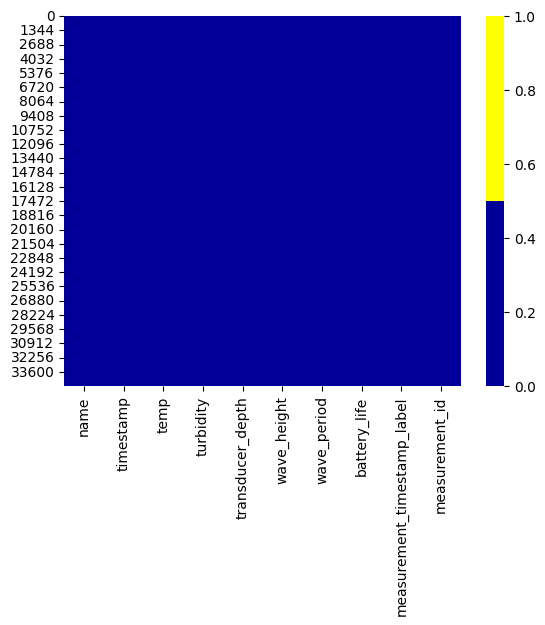

In [81]:
colours = ['#000099','#ffff00']
sns.heatmap(data2.isnull(),cmap=sns.color_palette(colours))
plt.show()

In [78]:
mean_vals  = data[['wave_height','wave_period','battery_life']].mean()
data2[['wave_height','wave_period','battery_life']] = data[['wave_height','wave_period','battery_life']].fillna(value=mean_vals)
data2.count()
#print(data2.isnull().sum())

,0
name,34923
timestamp,34917
temp,34917
turbidity,34917
transducer_depth,10034
wave_height,34923
wave_period,34923
battery_life,34923
measurement_timestamp_label,34917
measurement_id,34923


In [83]:
data2[data2['name']=='Calumet Beach'].head()
data2['HDepth']=data2['transducer_depth'] > 1.0
data2.head()

,name,timestamp,temp,turbidity,transducer_depth,wave_height,wave_period,battery_life,measurement_timestamp_label,measurement_id,HDepth
0,Montrose Beach,2013-08-30T08:00:00,20.3,1.18,0.891000,0.080,3.0,9.4,2013-08-30T08:00:00,MontroseBeach201308300800,False
1,Ohio Street Beach,2016-05-26T13:00:00,14.4,1.23,1.570235,0.111,4.0,12.4,2016-05-26T13:00:00,OhioStreetBeach201605261300,True
2,Calumet Beach,2013-09-03T16:00:00,23.2,3.63,1.201000,0.174,6.0,9.4,2013-09-03T16:00:00,CalumetBeach201309031600,True
3,Calumet Beach,2014-05-28T12:00:00,16.2,1.26,1.514000,0.147,4.0,11.7,2014-05-28T12:00:00,CalumetBeach201405281200,True
4,Montrose Beach,2014-05-28T12:00:00,14.4,3.36,1.388000,0.298,4.0,11.9,2014-05-28T12:00:00,MontroseBeach201405281200,True


In [84]:
# prompt: borrar columna

data2 = data2.drop('HDepth', axis=1)
data2.head()


,name,timestamp,temp,turbidity,transducer_depth,wave_height,wave_period,battery_life,measurement_timestamp_label,measurement_id
0,Montrose Beach,2013-08-30T08:00:00,20.3,1.18,0.891000,0.080,3.0,9.4,2013-08-30T08:00:00,MontroseBeach201308300800
1,Ohio Street Beach,2016-05-26T13:00:00,14.4,1.23,1.570235,0.111,4.0,12.4,2016-05-26T13:00:00,OhioStreetBeach201605261300
2,Calumet Beach,2013-09-03T16:00:00,23.2,3.63,1.201000,0.174,6.0,9.4,2013-09-03T16:00:00,CalumetBeach201309031600
3,Calumet Beach,2014-05-28T12:00:00,16.2,1.26,1.514000,0.147,4.0,11.7,2014-05-28T12:00:00,CalumetBeach201405281200
4,Montrose Beach,2014-05-28T12:00:00,14.4,3.36,1.388000,0.298,4.0,11.9,2014-05-28T12:00:00,MontroseBeach201405281200


In [94]:
data2['timestamp'] = pd.to_datetime(data2['timestamp'], format='%Y-%m-%d %H:%M:%S')
data2.head()

ValueError: time data "2013-08-30T08:00:00" doesn't match format "%Y-%m-%d %H:%M:%S", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [88]:
data_aux  = data2.sort_values(by='timestamp')
data_aux.head()

,name,timestamp,temp,turbidity,transducer_depth,wave_height,wave_period,battery_life,measurement_timestamp_label,measurement_id
0,Montrose Beach,2013-08-30T08:00:00,20.3,1.18,0.891,0.080,3.0,9.4,2013-08-30T08:00:00,MontroseBeach201308300800
825,Osterman Beach,2013-08-31T23:00:00,21.5,3.51,1.538,0.231,4.0,9.4,2013-08-31T23:00:00,OstermanBeach201308312300
278,Ohio Street Beach,2013-09-03T03:00:00,21.9,4.97,1.039,0.241,7.0,9.4,2013-09-03T03:00:00,OhioStreetBeach201309030300
2,Calumet Beach,2013-09-03T16:00:00,23.2,3.63,1.201,0.174,6.0,9.4,2013-09-03T16:00:00,CalumetBeach201309031600
823,63rd Street Beach,2013-09-18T10:00:00,18.9,7.56,1.517,0.140,4.0,11.0,2013-09-18T10:00:00,63rdStreetBeach201309181000


In [90]:
dataM = data_aux[data['name']=='Montrose Beach']
dataM.head()

<ipython-input-90-b7f549dd6f5c>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataM = data_aux[data['name']=='Montrose Beach']


,name,timestamp,temp,turbidity,transducer_depth,wave_height,wave_period,battery_life,measurement_timestamp_label,measurement_id
0,Montrose Beach,2013-08-30T08:00:00,20.3,1.18,0.891,0.080,3.0,9.4,2013-08-30T08:00:00,MontroseBeach201308300800
4,Montrose Beach,2014-05-28T12:00:00,14.4,3.36,1.388,0.298,4.0,11.9,2014-05-28T12:00:00,MontroseBeach201405281200
5,Montrose Beach,2014-05-28T13:00:00,14.5,2.72,1.395,0.306,3.0,11.9,2014-05-28T13:00:00,MontroseBeach201405281300
7,Montrose Beach,2014-05-28T14:00:00,14.8,2.97,1.386,0.328,3.0,11.9,2014-05-28T14:00:00,MontroseBeach201405281400
10,Montrose Beach,2014-05-28T15:00:00,14.5,4.30,1.377,0.328,3.0,11.9,2014-05-28T15:00:00,MontroseBeach201405281500


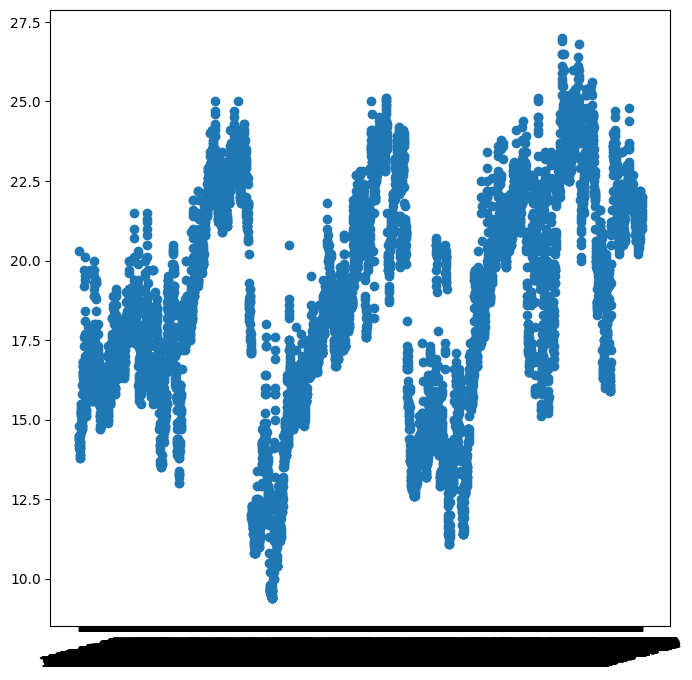

In [93]:
import matplotlib.dates as mdates
%matplotlib inline
plt.rc('figure', figsize=(8,8))

dataM= dataM.dropna()
plt.scatter(dataM['timestamp'],dataM['temp'])
plt.xticks(rotation=15)
dtFmt=mdates.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(dtFmt)
plt.show()

<Axes: ylabel='temp'>

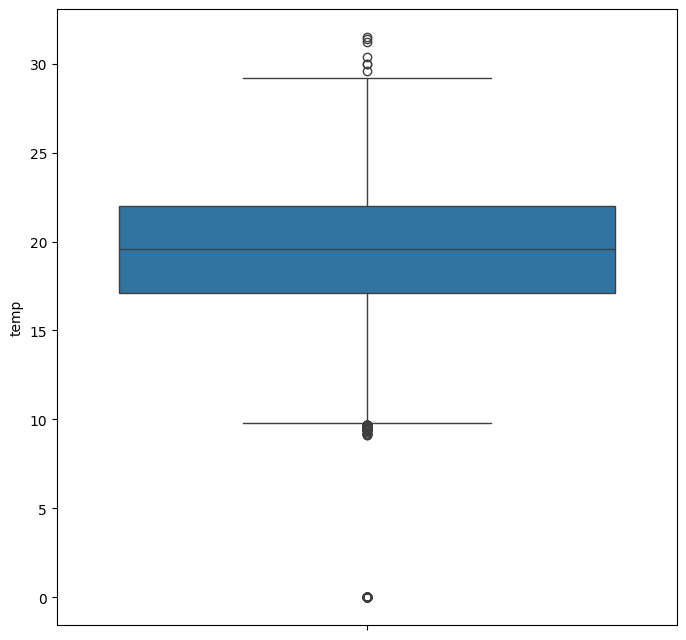

In [97]:
sns.boxplot(data=data['temp'])

In [104]:
df2=data2.loc[:,['temp','turbidity']].dropna().apply(stats.zscore)
df2.head()


,temp,turbidity
0,0.279038,-0.108753
1,-1.478707,-0.107261
2,1.143015,-0.035626
3,-0.942446,-0.106365
4,-1.478707,-0.043685


In [106]:
Zcore = np.abs(stats.zscore(data2.loc[:,['temp','turbidity']]))
Zcore.head()
index , flag = np.where(Zcore>3)
print(index)

[ 5040  6853  6859  6865  6871  6885  6891  6897  6935  6942  6948  6954
  6962  6994  7000  7006  7012  7018  7024  7030  7037  7043  7049  7055
  7064  7090  7096  7102  7113  7124  7131  7137  7160  7166  7172  7178
  7184  7190  7196  7207  7218  7224  7230  7236  7242  7248  7254  7282
  7288  7294  7300  7306  7312  7326  7331  7338  7344  7350  7356  7362
  7368  7374  7380  7547  7710  7784  8319  8320  8681  8684  8712  8722
  8749  8750  8751  8752  8754  8755  8833  8833  8836  8836  8848  8849
  8852  8853  8855  8856  8858  8859  8861  8862  8865  8865  8888  8898
  8908  8914  8918  8942  8943  8950  8953  8957  8961  8962  8965  9002
  9050  9050  9053  9053  9056  9056  9061  9064  9346  9351  9355  9359
  9363  9367  9371  9375  9382  9386  9390  9394  9398  9402  9406  9410
  9414  9418  9422  9426  9451  9455  9459  9465  9468  9477  9485  9493
  9510  9521  9529  9541  9549  9557  9565  9569  9584  9592  9604  9608
  9612  9617  9629  9637  9654  9661  9672  9676  9

In [107]:
data2.loc[index]

,name,timestamp,temp,turbidity,transducer_depth,wave_height,wave_period,battery_life,measurement_timestamp_label,measurement_id
5040,Rainbow Beach,2014-07-25T23:00:00,0.0,0.00,1.645000,0.096,9.0,9.5,2014-07-25T23:00:00,RainbowBeach201407252300
6853,Rainbow Beach,2014-07-23T03:00:00,0.0,0.00,1.729000,0.537,5.0,11.1,2014-07-23T03:00:00,RainbowBeach201407230300
6859,Rainbow Beach,2014-07-23T04:00:00,0.0,0.00,1.831000,0.576,6.0,11.0,2014-07-23T04:00:00,RainbowBeach201407230400
6865,Rainbow Beach,2014-07-23T05:00:00,0.0,0.00,1.778000,0.535,6.0,11.0,2014-07-23T05:00:00,RainbowBeach201407230500
6871,Rainbow Beach,2014-07-25T16:00:00,0.0,0.00,1.589000,0.105,4.0,9.6,2014-07-25T16:00:00,RainbowBeach201407251600
...,...,...,...,...,...,...,...,...,...,...
28360,Rainbow Beach,2015-09-11T20:00:00,19.6,136.26,1.570235,0.558,6.0,11.6,2015-09-11T20:00:00,RainbowBeach201509112000
30186,Rainbow Beach,2015-09-30T19:00:00,9.8,1362.80,1.570235,-99999.992,-100000.0,10.5,2015-09-30T19:00:00,RainbowBeach201509301900
30192,Rainbow Beach,2015-09-30T23:00:00,16.4,217.08,1.570235,-99999.992,-100000.0,10.4,2015-09-30T23:00:00,RainbowBeach201509302300
30198,Rainbow Beach,2015-10-01T06:00:00,15.8,357.35,1.570235,-99999.992,-100000.0,10.4,2015-10-01T06:00:00,RainbowBeach201510010600


In [108]:
data_out  = data2[(Zcore < 3.0).all(axis=1)]
data_out.head()

,name,timestamp,temp,turbidity,transducer_depth,wave_height,wave_period,battery_life,measurement_timestamp_label,measurement_id
0,Montrose Beach,2013-08-30T08:00:00,20.3,1.18,0.891000,0.080,3.0,9.4,2013-08-30T08:00:00,MontroseBeach201308300800
1,Ohio Street Beach,2016-05-26T13:00:00,14.4,1.23,1.570235,0.111,4.0,12.4,2016-05-26T13:00:00,OhioStreetBeach201605261300
2,Calumet Beach,2013-09-03T16:00:00,23.2,3.63,1.201000,0.174,6.0,9.4,2013-09-03T16:00:00,CalumetBeach201309031600
3,Calumet Beach,2014-05-28T12:00:00,16.2,1.26,1.514000,0.147,4.0,11.7,2014-05-28T12:00:00,CalumetBeach201405281200
4,Montrose Beach,2014-05-28T12:00:00,14.4,3.36,1.388000,0.298,4.0,11.9,2014-05-28T12:00:00,MontroseBeach201405281200
